In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv('cmc_train.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
# print(train_labels)

train_features = df.iloc[:,:9]
train_features = np.array(train_features)
# print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('cmc_test.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
# print(test_labels)

test_features = df.iloc[:,:9]
test_features = np.array(test_features)
# print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

X = np.vstack((train_features, test_features))
y = np.hstack((train_labels, test_labels))
print(X)
print(y)

[[24  2  3 ...  2  3  0]
 [45  1  3 ...  3  4  0]
 [43  2  3 ...  3  4  0]
 ...
 [37  4  4 ...  3  4  0]
 [27  2  2 ...  3  1  0]
 [28  4  4 ...  1  3  0]]
[1 1 1 ... 3 3 3]


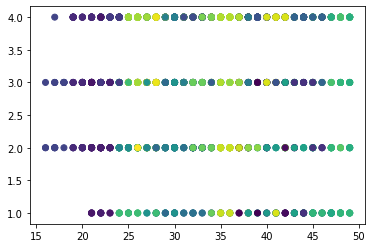

n_clusters： 36
0.0079853389936428


In [12]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import matplotlib.pyplot as plt

ap = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False).fit(X)

#聚类
y_pred = ap.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()
# print('preference=-50')
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('n_clusters：',n_clusters_)
print(metrics.adjusted_rand_score(y, y_pred))